# Author:Mehenaz Taherin
### Data Science & Business Analytics Intern
### GRIP - The Sparks Foundation

**Task 03**

**Task Objective**
- Perform Exploratory DAta Analysis on Sample Super store
- Gain the insights of various variables and relationships.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the csv file
df=pd.read_csv('SampleSuperstore.csv')
df.head(n=10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [3]:
df.shape

(9994, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


## Preparing data

In [6]:
#counts the value from each columns:
for i in df.columns:
    x=df[i].nunique()
    print(i,x)

Ship Mode 4
Segment 3
Country 1
City 531
State 49
Postal Code 631
Region 4
Category 3
Sub-Category 17
Sales 5825
Quantity 14
Discount 12
Profit 7287


**As we can see,The Country column has only 1 value.so we can drop this column.Also,i think that the postal code column wont add any value to any relationship.So,drop these two column.**

In [7]:
df1=df.drop(['Country','Postal Code'],axis=1)
df1

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [9]:
df1.shape

(9994, 11)

In [10]:
#check For null values:

if len(df1[df1.isnull().any(axis=1)]!=0):
    print("\n preview of null entries:\nxxxxx")
    print(df1[df1.isnull().any(axis=1)].head(3))
    missingno.matrix(df1)
    plt.show()
else:
    print("no null values")

no null values


In [11]:
#check for duplicate values:

if len(df1[df1.duplicated()])>0:
    print("No of duplicated entries:",len(df1[df1.duplicated()]))
    print(df1[df1.duplicated(keep=False)].sort_values(by=list(df1.columns)).head())
else:
    print("no duplicated values are found")

No of duplicated entries: 50
        Ship Mode   Segment         City       State   Region  \
6409  First Class  Consumer      Houston       Texas  Central   
8032  First Class  Consumer      Houston       Texas  Central   
1037  First Class  Consumer  Los Angeles  California     West   
7362  First Class  Consumer  Los Angeles  California     West   
2887  First Class  Consumer  Los Angeles  California     West   

             Category Sub-Category   Sales  Quantity  Discount   Profit  
6409  Office Supplies        Paper  47.952         3       0.2  16.1838  
8032  Office Supplies        Paper  47.952         3       0.2  16.1838  
1037  Office Supplies      Binders  36.624         3       0.2  13.7340  
7362  Office Supplies      Binders  36.624         3       0.2  13.7340  
2887  Office Supplies        Paper  12.960         2       0.0   6.2208  


In [12]:
#df1.duplicated().sum()
df1.drop_duplicates(keep="first",inplace=True)
df1.shape

(9944, 11)

## Explore the dataset

In [13]:
df1['Sub-Category'].value_counts()

Binders        1518
Paper          1344
Furnishings     954
Phones          888
Storage         845
Art             793
Accessories     773
Chairs          615
Appliances      466
Labels          359
Tables          319
Envelopes       254
Bookcases       226
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

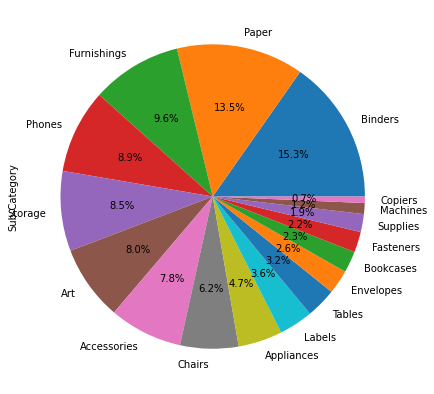

In [17]:
plt.figure(figsize=(18,7))
df1['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

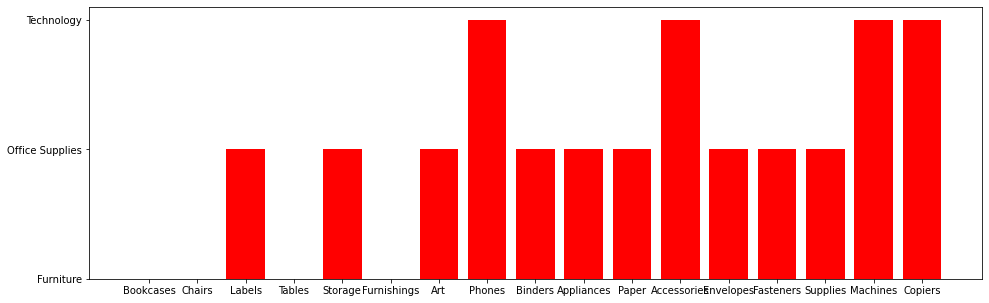

In [18]:
plt.figure(figsize=(16,5))
plt.bar('Sub-Category','Category',data=df1,color='r')
plt.show()

<AxesSubplot:xlabel='Category'>

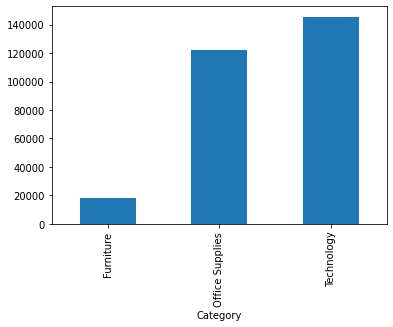

In [19]:
df1.groupby('Category')['Profit'].sum().plot.bar()

In [23]:
#hich category give the highprofit
df1.groupby('Category')['Profit'].sum()

Category
Furniture           18484.9459
Office Supplies    122196.0726
Technology         145416.5394
Name: Profit, dtype: float64

### observation:The Furniture Caategory makes lower profit than office supplies and Technology

In [22]:
#Category with high Profit 
df1.sort_values(['Profit','Category'],ascending=False).groupby('Profit').head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
6826,Standard Class,Corporate,Lafayette,Indiana,Central,Technology,Copiers,17499.950,5,0.0,8399.9760
8153,First Class,Consumer,Seattle,Washington,West,Technology,Copiers,13999.960,4,0.0,6719.9808
4190,Standard Class,Consumer,Newark,Delaware,East,Technology,Copiers,10499.970,3,0.0,5039.9856
9039,Standard Class,Consumer,Detroit,Michigan,Central,Office Supplies,Binders,9892.740,13,0.0,4946.3700
4098,Standard Class,Consumer,Minneapolis,Minnesota,Central,Office Supplies,Binders,9449.950,5,0.0,4630.4755
...,...,...,...,...,...,...,...,...,...,...,...
4991,Standard Class,Corporate,Chicago,Illinois,Central,Office Supplies,Binders,1889.990,5,0.8,-2929.4845
3011,Standard Class,Home Office,Louisville,Colorado,West,Technology,Machines,2549.985,5,0.7,-3399.9800
9774,Standard Class,Consumer,San Antonio,Texas,Central,Office Supplies,Binders,2177.584,8,0.8,-3701.8928
683,Same Day,Corporate,Burlington,North Carolina,South,Technology,Machines,7999.980,4,0.5,-3839.9904


In [21]:
#Category with low Profit 
df1.sort_values(['Profit','Category'],ascending=True).groupby('Profit').head(n=5)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7772,Standard Class,Consumer,Lancaster,Ohio,East,Technology,Machines,4499.985,5,0.7,-6599.9780
683,Same Day,Corporate,Burlington,North Carolina,South,Technology,Machines,7999.980,4,0.5,-3839.9904
9774,Standard Class,Consumer,San Antonio,Texas,Central,Office Supplies,Binders,2177.584,8,0.8,-3701.8928
3011,Standard Class,Home Office,Louisville,Colorado,West,Technology,Machines,2549.985,5,0.7,-3399.9800
4991,Standard Class,Corporate,Chicago,Illinois,Central,Office Supplies,Binders,1889.990,5,0.8,-2929.4845
...,...,...,...,...,...,...,...,...,...,...,...
4098,Standard Class,Consumer,Minneapolis,Minnesota,Central,Office Supplies,Binders,9449.950,5,0.0,4630.4755
9039,Standard Class,Consumer,Detroit,Michigan,Central,Office Supplies,Binders,9892.740,13,0.0,4946.3700
4190,Standard Class,Consumer,Newark,Delaware,East,Technology,Copiers,10499.970,3,0.0,5039.9856
8153,First Class,Consumer,Seattle,Washington,West,Technology,Copiers,13999.960,4,0.0,6719.9808


Text(0.5, 1.0, 'Sub-Category vs Quantity')

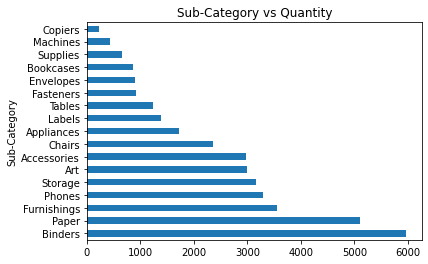

In [26]:
# sub Category vs Quantity
df1.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending=False).plot.barh()
plt.title("Sub-Category vs Quantity")

In [25]:
#count the state:
df1['Region'].value_counts()

West       3177
East       2832
Central    2315
South      1620
Name: Region, dtype: int64

In [50]:
#which region sold the most product
df1.groupby(['Region']).sum()

,Sales,Quantity,Discount,Profit
Region,,,,
Central,501239.8908,8780,558.34,39706.3625
East,678781.2400,10618,414.00,91522.7800
South,391721.9050,6209,238.55,46749.4303
West,725457.8245,12266,350.20,108418.4489


### observation: West Region sold the most products

In [28]:
df1['State'].nunique()

49

In [55]:
#Top 10 state for high sales
top_stateforsales=df1.groupby('State')['Sales'].sum().to_frame().reset_index().nlargest(10,'Sales')
#top_stateforsales

,State,Sales
3,California,457687.6315
30,New York,310876.2710
41,Texas,170188.0458
45,Washington,138641.2700
36,Pennsylvania,116511.9140
8,Florida,89473.7080
11,Illinois,80166.1010
33,Ohio,78258.1360
20,Michigan,76269.6140
44,Virginia,70636.7200


<AxesSubplot:xlabel='State', ylabel='Sales'>

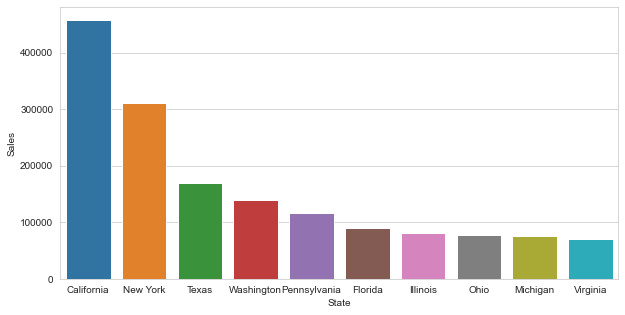

In [64]:
plt.figure(figsize=(10,5))
sns.barplot(x='State',y='Sales',data=top_stateforsales)

In [56]:
#top 10 state for highest profit makeing
top_stateforprofit=df1.groupby('State')['Profit'].sum().to_frame().reset_index().nlargest(10,'Profit')
top_stateforprofit

,State,Profit
3,California,76381.3871
30,New York,74038.5486
45,Washington,33402.6517
20,Michigan,24463.1876
44,Virginia,18597.9504
12,Indiana,18382.9363
9,Georgia,16250.0433
15,Kentucky,11199.6966
21,Minnesota,10823.1874
6,Delaware,9977.3748


<AxesSubplot:xlabel='State', ylabel='Profit'>

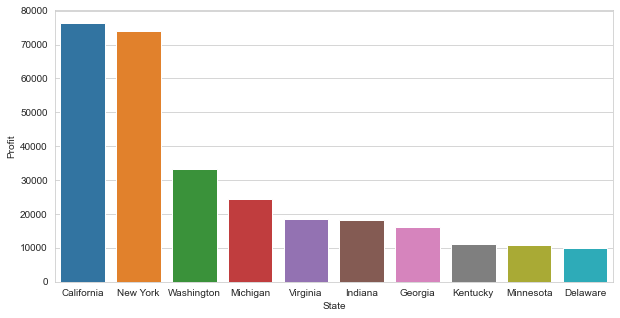

In [65]:
plt.figure(figsize=(10,5))
sns.barplot(x='State',y='Profit',data=top_stateforprofit)

In [29]:
# profit per state:
df1.groupby(['State']).sum().head(n=10)

,Sales,Quantity,Discount,Profit
State,,,,
Alabama,19510.6400,256,0.00,5786.8253
Arizona,35282.0010,862,68.00,-3427.9246
Arkansas,11678.1300,240,0.00,4008.6871
California,456629.9285,7602,144.85,76215.9705
Colorado,32108.1180,693,57.60,-6527.8579
Connecticut,13384.3570,281,0.60,3511.4918
Delaware,27451.0690,367,0.60,9977.3748
District of Columbia,2865.0200,40,0.00,1059.5893
Florida,89473.7080,1379,114.65,-3399.3017


<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

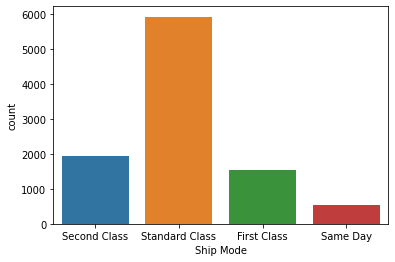

In [31]:
sns.countplot(x='Ship Mode',data=df1)

<AxesSubplot:xlabel='Segment', ylabel='count'>

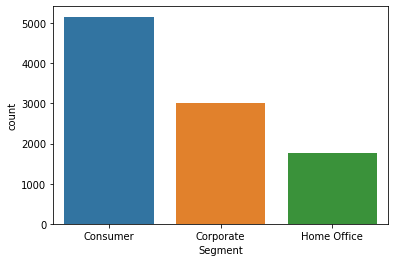

In [32]:
sns.countplot(x='Segment',data=df1)

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

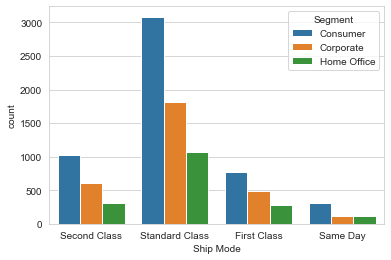

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Ship Mode',hue='Segment',data=df1)

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


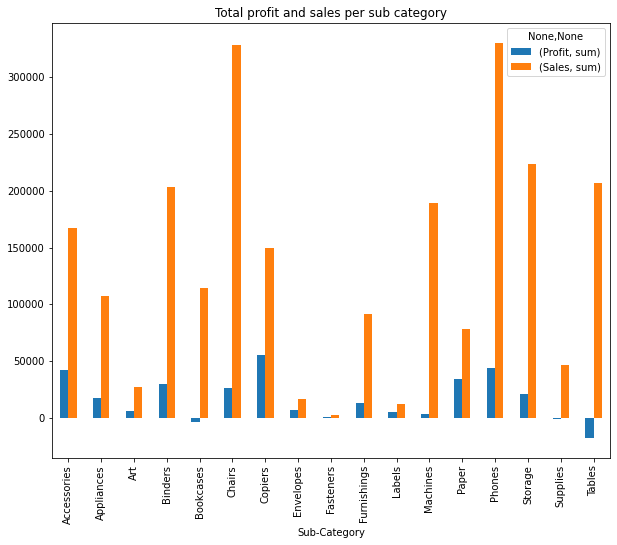

In [9]:
#Total profit and sales per sub category
df1.groupby('Sub-Category')['Profit','Sales'].agg([sum]).plot.bar(figsize=(10,8))
plt.title('Total profit and sales per sub category')
plt.show()

#### Bookcases,supplies and tables are not giving profit as per sales.wheres copiers are giving much profit followed by accesseries

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


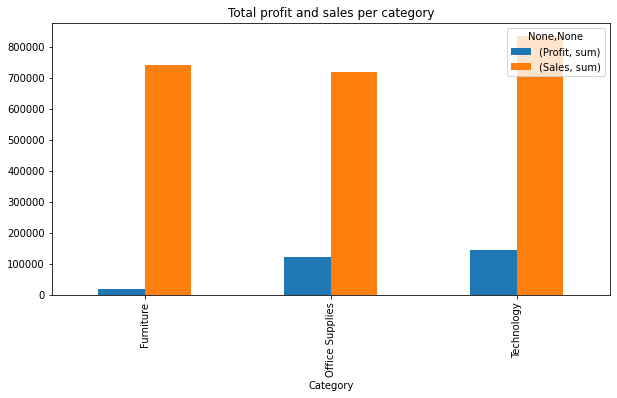

In [10]:
#Total profit and sales per category
df1.groupby('Category')['Profit','Sales'].agg([sum]).plot.bar(figsize=(10,5))
plt.title('Total profit and sales per category')
plt.show()

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


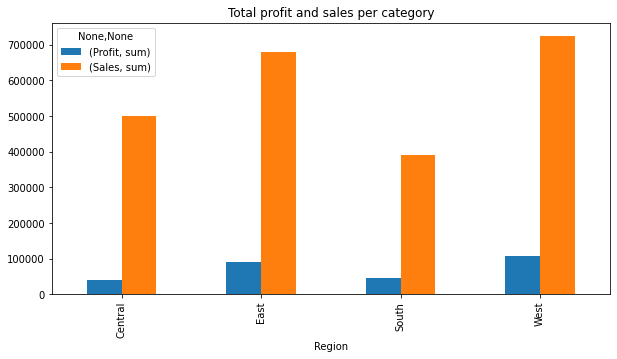

In [11]:
#'Total profit and sales per region
df1.groupby('Region')['Profit','Sales'].agg([sum]).plot.bar(figsize=(10,5))
plt.title('Total profit and sales per region')
plt.show()

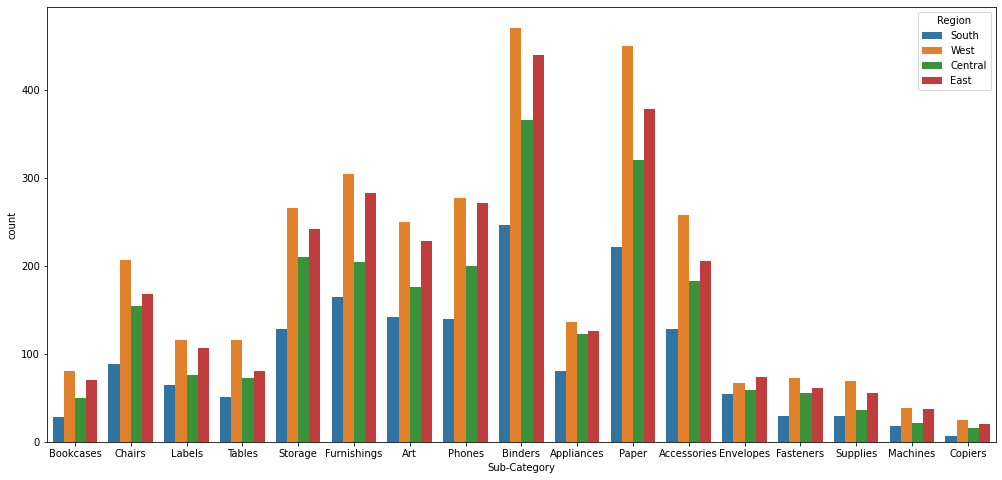

In [12]:

#Count of Sub-Category region wise
plt.figure(figsize=(17,8))
sns.countplot(x="Sub-Category", hue="Region", data=df1)
plt.show()

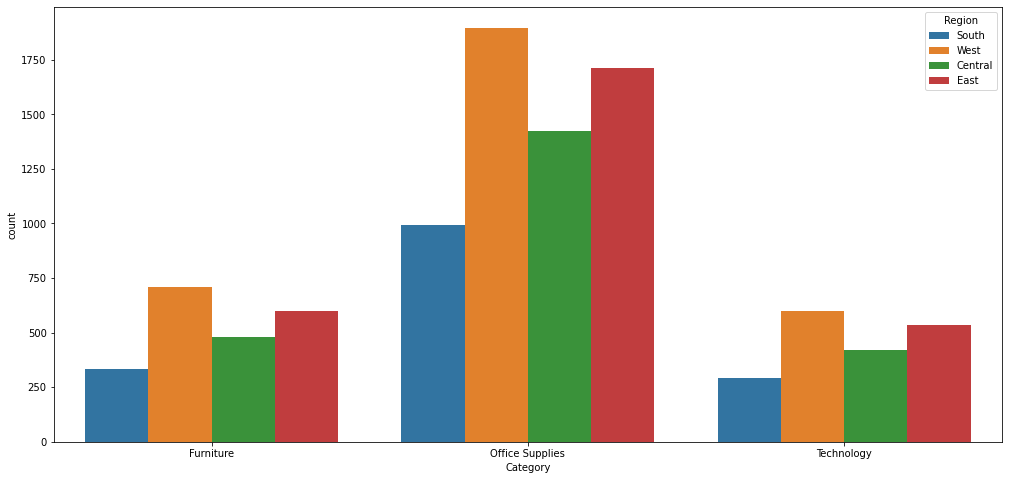

In [13]:
plt.figure(figsize=(17,8))
sns.countplot(x="Category", hue="Region", data=df1)
plt.show()

C:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sales', ylabel='Profit'>

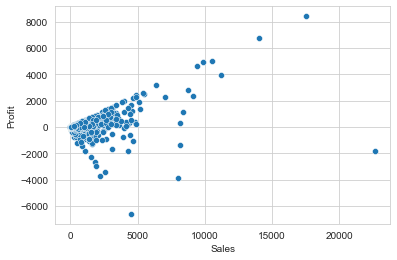

In [37]:
sns.scatterplot("Sales","Profit",data=df1)

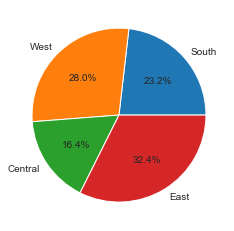

In [71]:
#quantities ordered by each region:
region=df1.groupby('Region')['Quantity'].sum().reset_index()
labels=df1['Region'].unique()
plt.pie(region['Quantity'],autopct='%1.1f%%',labels=labels,)
plt.show()

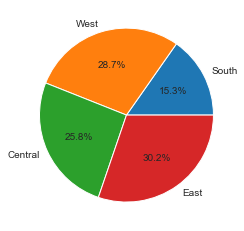

In [74]:
#avg profit ordered by each region:
region=df1.groupby('Region')['Profit'].mean().reset_index()
labels=df1['Region'].unique()
plt.pie(region['Profit'],autopct='%1.1f%%',labels=labels,)
plt.show()

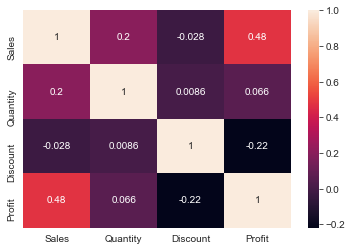

In [16]:
correlation=df1.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True);

#### profit is not been influenced by discount as it has negetive corelation.Also Sales has much corelation with profit.

### final observation::
- The category gives the highest profit is taken by Technology.
- The category Furniture needs to pay attention as it is  hardly making profit.
- discount has no effect on the number of product also profit is not been really effected by discount.
- "Consumer segment spend  the most on purchase.
- West region gives the highest profit.